In [1]:
from nuimages import NuImages

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from random import randrange
import random

In [2]:
nuim = NuImages(dataroot='./', version='v1.0-mini', verbose=True, lazy=True)

Loading nuImages tables for version v1.0-mini...
Done loading in 0.000 seconds (lazy=True).


In [3]:
print(len(nuim.sample))

Loaded 50 sample(s) in 0.006s,
50


In [5]:
sample_idx = 0
sample = nuim.sample[sample_idx]
key_camera_token = sample['key_camera_token']

Loaded 650 sample_data(s) in 0.010s,
Loaded 58 surface_ann(s) in 0.007s,
Loaded 25 category(s) in 0.005s,
Loaded 506 object_ann(s) in 0.006s,
Loaded 12 attribute(s) in 0.004s,


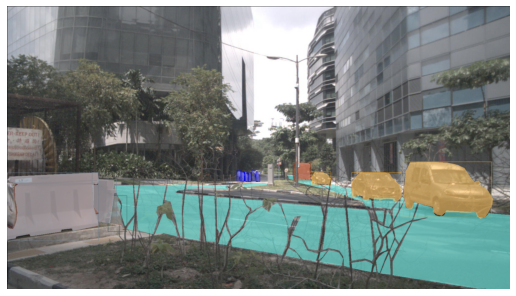

In [6]:
nuim.render_image(key_camera_token)

In [7]:
semantic_mask, instance_mask = nuim.get_segmentation(key_camera_token)


In [8]:
semantic_mask

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 24, 24, 24],
       [ 0,  0,  0, ..., 24, 24, 24],
       [ 0,  0,  0, ..., 24, 24, 24]])

16


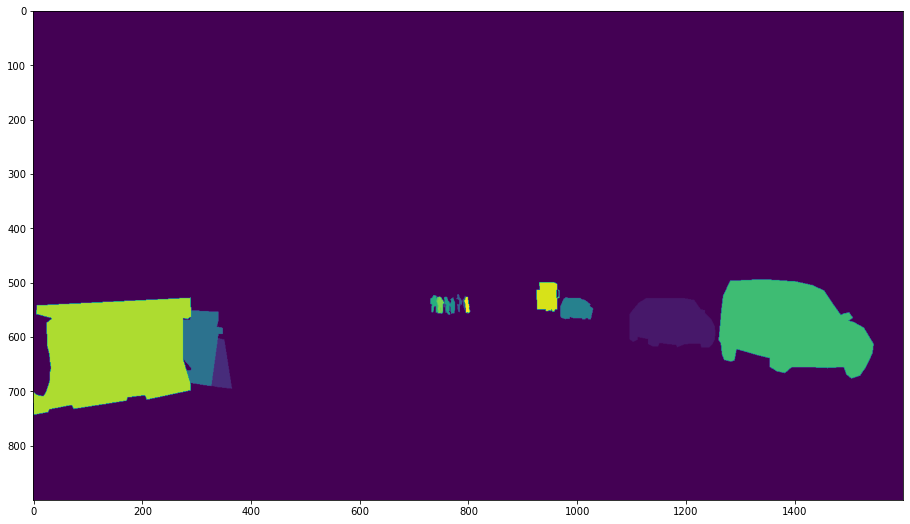

In [37]:
plt.figure(figsize=(32, 9))
plt.imshow(instance_mask)

print(np.max(instance_mask))

Printing object annotations:
06eed0ca8b164b84bbb2851de1ed2c13 vehicle.car ['vehicle.moving']
0e8ba57c7b69482c88319f5c1b4deeb0 movable_object.trafficcone []
11ec9a46540443339e2e38afbe31f7b1 human.pedestrian.adult ['pedestrian.standing']
4b27e4a70d464cb2a2f33d5dbcf85094 human.pedestrian.adult ['pedestrian.moving']
4c76bc9ee7da40668f1d4b294209ae3b human.pedestrian.adult ['pedestrian.standing']
4e61ccd6905644adb0556e1f336cee79 movable_object.barrier []
584cb4bd0e7c4a0b8b1169191ca828a1 vehicle.car ['vehicle.moving']
677a87b7df1a4ee7a7a36bab569cccbd human.pedestrian.adult ['pedestrian.moving']
683e330396134c6393fd77187194990c human.pedestrian.adult ['pedestrian.moving']
82e0c68c0f2440bcb041a51a6f116513 human.pedestrian.adult ['pedestrian.moving']
8dc2b24b1a69434a8aade0cb4e308e8e vehicle.car ['vehicle.moving']
924572ff00404ae59d1ee2f6f6c92274 human.pedestrian.adult ['pedestrian.moving']
9b8ea679730b43d7b6631ceeb56e0ccf human.pedestrian.adult ['pedestrian.moving']
a457fc08800444bc83900e3a12b00

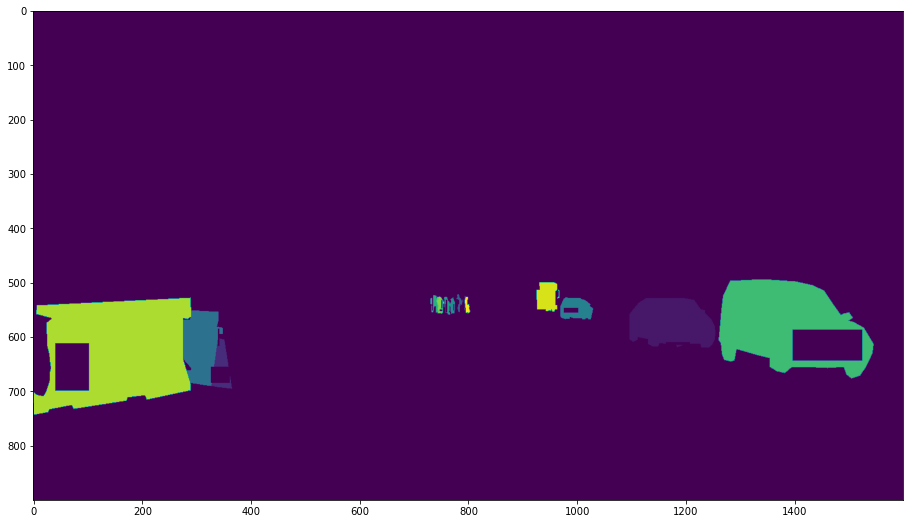

In [35]:
#random square black out block
object_tokens, surface_tokens = nuim.list_anns(sample['token'])
human_id=[]

test_seg = instance_mask.copy()
for i in range(len(object_tokens)):
    anno=nuim.get('object_ann',object_tokens[i])
    cat=nuim.get('category',nuim.get('object_ann',object_tokens[i])['category_token'])
    if(cat['name']=='human.pedestrian.adult'):
        human_id.append(i)
    bbox=anno['bbox']
    bbox_x1=bbox[0]
    bbox_x2=bbox[2]
    bbox_y1=bbox[1]
    bbox_y2=bbox[3]
    cut_x1 = random.randint(bbox_x1,bbox_x2)
    cut_x2 = random.randint(bbox_x1,bbox_x2)
    cut_y1 = random.randint(bbox_y1,bbox_y2)
    cut_y2 = random.randint(bbox_y1,bbox_y2)
    test_seg[min(cut_y1,cut_y2):max(cut_y1,cut_y2),min(cut_x1,cut_x2):max(cut_x1,cut_x2)]=0
plt.figure(figsize=(32, 9))
plt.imshow(test_seg)

In [28]:
object_tokens, surface_tokens = nuim.list_anns(sample['token'])
print(len(object_tokens))
print(nuim.get('object_ann',object_tokens[2]))
print(nuim.get('category',nuim.get('object_ann',object_tokens[2])['category_token']))

Printing object annotations:
06eed0ca8b164b84bbb2851de1ed2c13 vehicle.car ['vehicle.moving']
0e8ba57c7b69482c88319f5c1b4deeb0 movable_object.trafficcone []
11ec9a46540443339e2e38afbe31f7b1 human.pedestrian.adult ['pedestrian.standing']
4b27e4a70d464cb2a2f33d5dbcf85094 human.pedestrian.adult ['pedestrian.moving']
4c76bc9ee7da40668f1d4b294209ae3b human.pedestrian.adult ['pedestrian.standing']
4e61ccd6905644adb0556e1f336cee79 movable_object.barrier []
584cb4bd0e7c4a0b8b1169191ca828a1 vehicle.car ['vehicle.moving']
677a87b7df1a4ee7a7a36bab569cccbd human.pedestrian.adult ['pedestrian.moving']
683e330396134c6393fd77187194990c human.pedestrian.adult ['pedestrian.moving']
82e0c68c0f2440bcb041a51a6f116513 human.pedestrian.adult ['pedestrian.moving']
8dc2b24b1a69434a8aade0cb4e308e8e vehicle.car ['vehicle.moving']
924572ff00404ae59d1ee2f6f6c92274 human.pedestrian.adult ['pedestrian.moving']
9b8ea679730b43d7b6631ceeb56e0ccf human.pedestrian.adult ['pedestrian.moving']
a457fc08800444bc83900e3a12b00

In [25]:
nuim.table_names

['attribute',
 'calibrated_sensor',
 'category',
 'ego_pose',
 'log',
 'object_ann',
 'sample',
 'sample_data',
 'sensor',
 'surface_ann']